<a href="https://colab.research.google.com/github/VIKAS-PURBIA/Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce/blob/main/shopper_spectrum_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce


##### **Project Type**    - Unsupervised Learning + Recommendation System
* RFM-based customer segmentation using clustering
* collaborative filtering-based product recommendations

##### **Contribution**    - Individual
##### **Name** - Vikas Purbia

## **Project Summary -**




Shopper Spectrum is a machine learning project designed to analyze e-commerce transaction data for customer segmentation and product recommendation. Using the Online Retail dataset, the project applies RFM (Recency, Frequency, Monetary) analysis to identify customer purchasing behaviors and categorize them into meaningful segments using K-Means clustering.

Customers are grouped into categories such as High-Value, Regular, Occasional, and At-Risk, enabling businesses to target each segment with personalized marketing strategies.

The second part of the project involves building an item-based collaborative filtering recommendation system. This system calculates product similarities using cosine similarity and recommends the top 5 most similar products based on a given product code.

To provide an interactive user experience, the solution is deployed as a web application using Streamlit and hosted via ngrok in Google Colab. The app has two key modules:

Product Recommendation – Recommends similar products based on input product code.

Customer Segmentation – Predicts customer segment based on input RFM values.

Overall, this project demonstrates practical applications of unsupervised learning, collaborative filtering, and real-time ML deployment. It showcases skills in data preprocessing, clustering, recommendation systems, and web-based app development.

## **GitHub Link -**

https://github.com/VIKAS-PURBIA/Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce.git

## Problem Statement


 Project Title - Shopper Spectrum: Customer Segmentation and Product Recommendation in E- Commerce
 ###  Objective
Analyze transaction data from an e-commerce store to:
- Segment customers using RFM (Recency, Frequency, Monetary) analysis
- Build a product recommendation system using item-based collaborative filtering
- Deploy an interactive Streamlit web app

---

### 📂 Dataset
- **Source**: UCI Online Retail [Dataset](https://drive.google.com/file/d/1B6-YkpAU4RjEmnbghoDS0PuR3P9gHZGf/view?usp=drive_link)
- **Fields**:
  - `InvoiceNo`: Transaction ID
  - `StockCode`: Product Code
  - `Description`: Product Name
  - `Quantity`: Units Purchased
  - `InvoiceDate`: Purchase Timestamp
  - `UnitPrice`: Price per Unit
  - `CustomerID`: Unique Customer Identifier
  - `Country`: Customer’s Country

---


# ***Let's Begin!***

## Import Libraries

In [3]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [2]:
from google.colab import files
uploaded = files.upload()


Saving online_retail.csv to online_retail (1).csv


In [4]:
# 2. LOAD DATA

df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preprocessing:


In [5]:
# DATA CLEANING
# Drop missing CustomerIDs
df.dropna(subset=['CustomerID'], inplace=True)

# Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove non-positive Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.shape


(397884, 9)

  # Exploratory Data Analysis (EDA):

 1. Transaction Volume by Country

<Axes: title={'center': 'Number of Transactions by Country'}, xlabel='Country'>

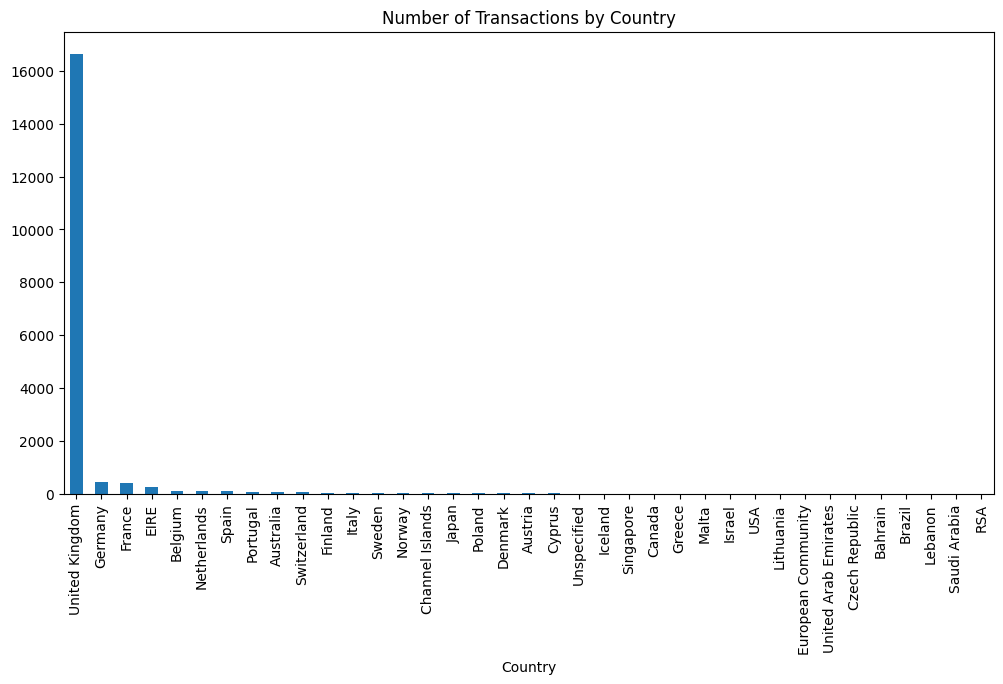

In [6]:
country_orders = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
country_orders.plot(kind='bar', figsize=(12,6), title='Number of Transactions by Country')


 2. Top-Selling Products



<Axes: title={'center': 'Top 10 Best-Selling Products'}, xlabel='Description'>

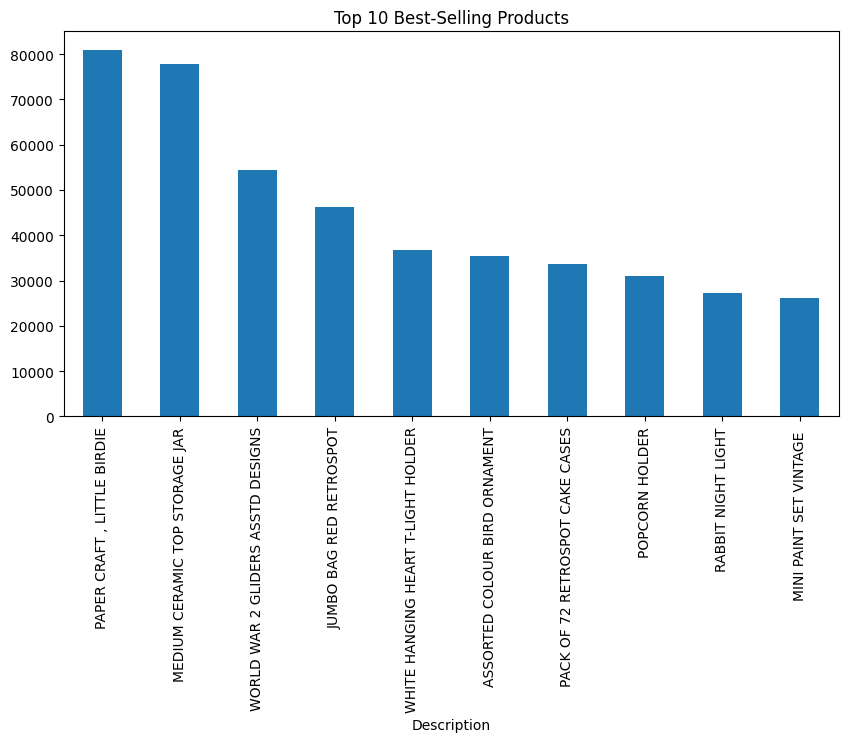

In [7]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Best-Selling Products')



 3. Purchase Trends Over Time

<Axes: title={'center': 'Weekly Revenue Over Time'}, xlabel='InvoiceDate'>

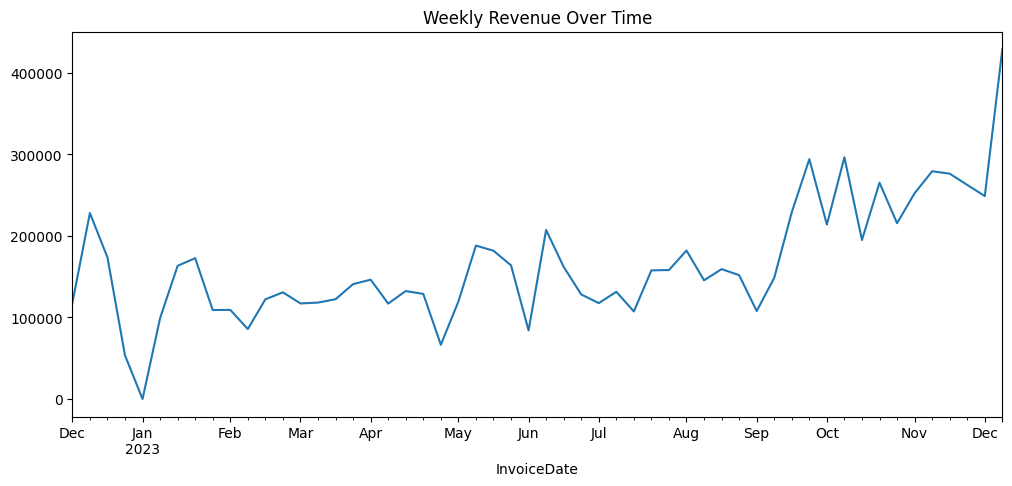

In [8]:
df.set_index('InvoiceDate')['TotalPrice'].resample('W').sum().plot(figsize=(12,5), title='Weekly Revenue Over Time')


4. Monetary Distribution per Transaction & Customer

In [9]:
# Make sure 'df' is already cleaned
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


Text(0.5, 1.0, 'Customer Monetary Value Distribution')

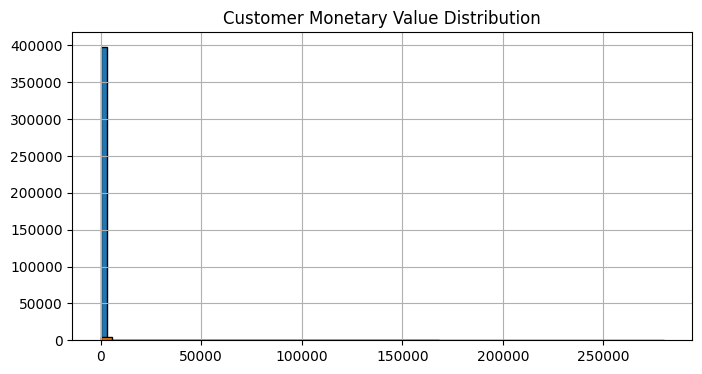

In [10]:
df['TotalPrice'].hist(bins=50, figsize=(8,4), edgecolor='black')
plt.title('Transaction Amount Distribution')

rfm['Monetary'].hist(bins=50, figsize=(8,4), edgecolor='black')
plt.title('Customer Monetary Value Distribution')


5. RFM Distributions



Text(0.5, 1.0, 'Monetary Distribution')

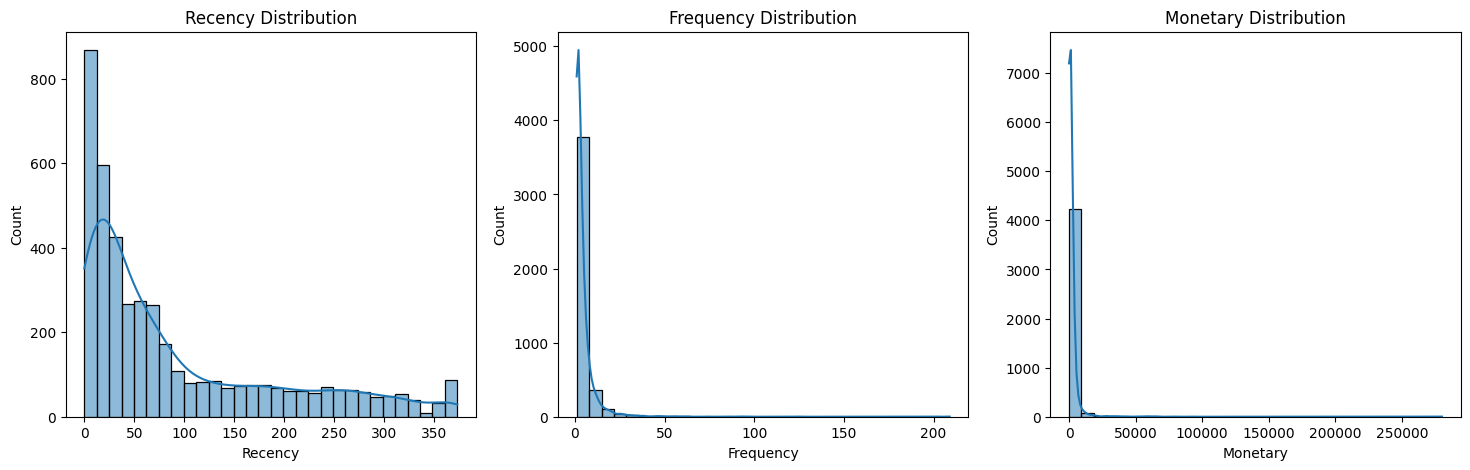

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=30, ax=axs[0], kde=True)
sns.histplot(rfm['Frequency'], bins=30, ax=axs[1], kde=True)
sns.histplot(rfm['Monetary'], bins=30, ax=axs[2], kde=True)
axs[0].set_title('Recency Distribution')
axs[1].set_title('Frequency Distribution')
axs[2].set_title('Monetary Distribution')


 6. Elbow Curve for KMeans Clustering


In [12]:
from sklearn.preprocessing import StandardScaler

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


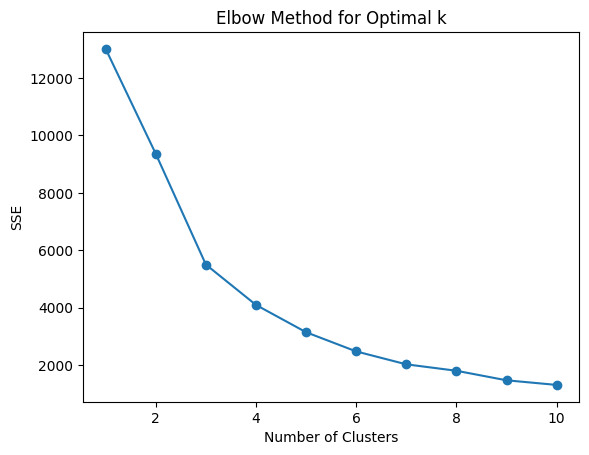

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


7. Customer Cluster Profiles

In [14]:
rfm['Cluster'] = kmeans.predict(rfm_scaled)
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)


            Recency   Frequency       Monetary
Cluster                                       
0         23.102167    2.931889    1035.168335
1        307.705645    1.284274     401.629153
2          1.000000   87.142857   35600.392857
3         30.785714   31.714286   80586.564286
4         10.030303   26.090909   12679.618485
5         85.771033    2.243876     870.505934
6          2.666667   59.666667  244804.703333
7         18.639085   10.072183    3961.419173
8          0.000000  205.000000   88772.395000
9        192.584874    1.858824     719.758052


 8. Product Recommendation Heatmap / Similarity Matrix

In [15]:
# Create Customer × Product matrix
pivot = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


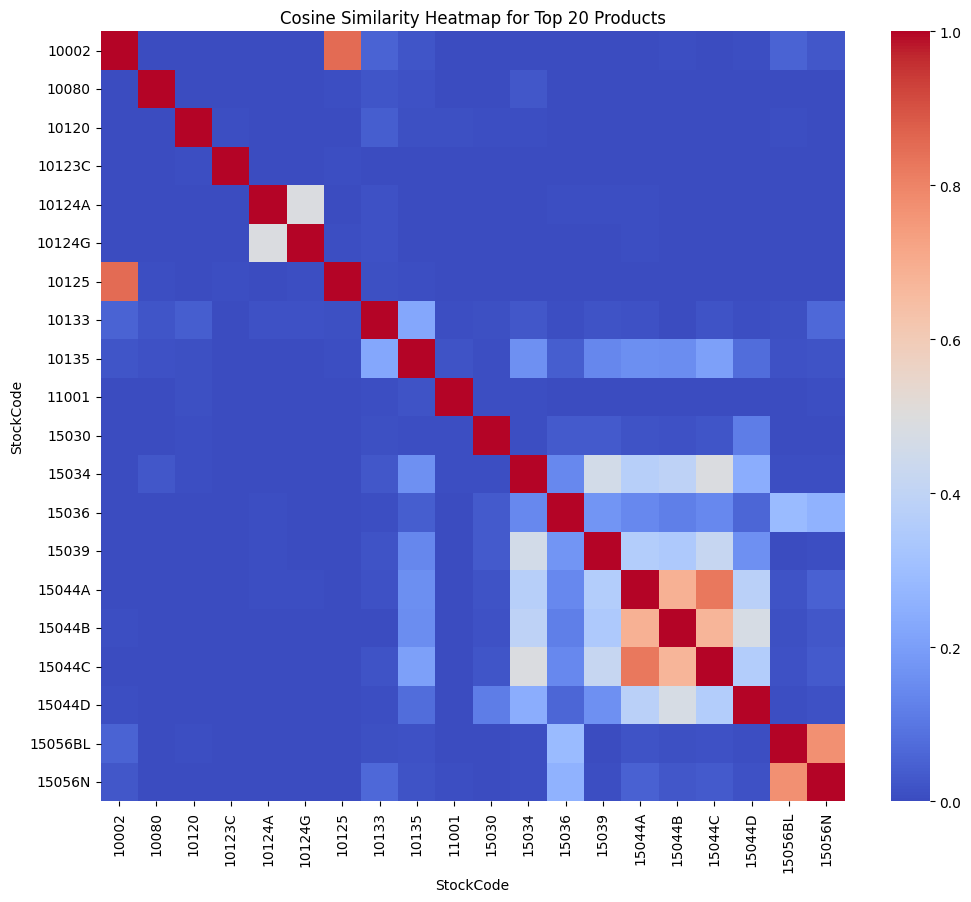

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Compute cosine similarity between products
sim_matrix = cosine_similarity(pivot.T)
sim_df = pd.DataFrame(sim_matrix, index=pivot.columns, columns=pivot.columns)

# Heatmap of top 20 products
plt.figure(figsize=(12, 10))
sns.heatmap(sim_df.iloc[:20, :20], cmap='coolwarm')
plt.title("Cosine Similarity Heatmap for Top 20 Products")
plt.show()


## Clustering Methodology:

 1. RFM FEATURE ENGINEERING

In [17]:
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
# Display
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


2. NORMALIZATION

In [18]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

 3. Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)


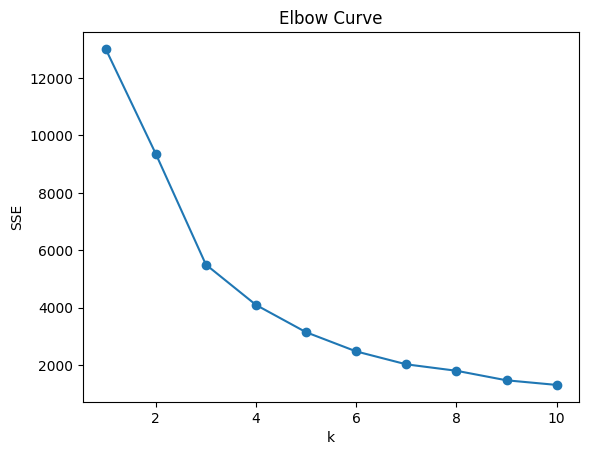

In [19]:
# K-MEANS CLUSTERING
# Elbow Method
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

4.  Use Elbow Method , Silhouette Score to decide the number of clusters


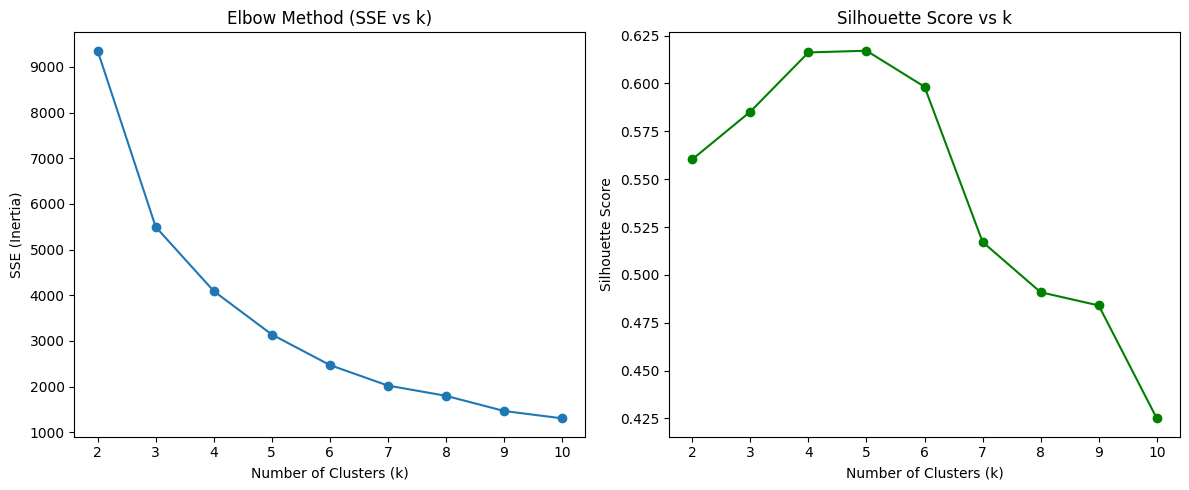

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Make sure rfm_scaled is already created
# Test cluster sizes from 2 to 10
sse = []
silhouette_scores = []

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared errors
    silhouette = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)  # Silhouette Score

# Plot Elbow Curve
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title('Elbow Method (SSE vs k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


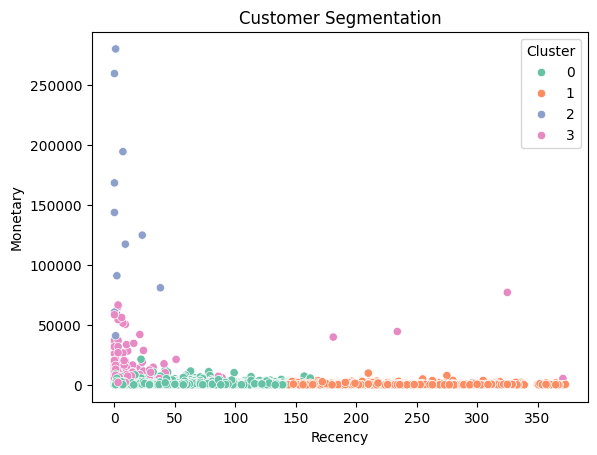

In [21]:
# Choose optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize clusters
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Customer Segmentation")
plt.show()

5. LABEL CLUSTERS

### 🔍 Customer Segmentation
- Used **KMeans clustering** to group customers
- Chose optimal cluster count using **Elbow Method**
- Assigned customer segments based on RFM behavior:

| Cluster Label | Characteristics                              |
|---------------|-----------------------------------------------|
| High-Value    | Recent, frequent, and high-spending buyers   |
| Regular       | Steady purchasers with medium value          |
| Occasional    | Rare or one-time shoppers                    |
| At-Risk       | Haven’t purchased in a long time             |


In [22]:
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'High-Value'
    elif row['Cluster'] == 1:
        return 'At-Risk'
    elif row['Cluster'] == 2:
        return 'Occasional'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,1,77183.60,3,Regular
1,12347.0,1,7,4310.00,0,High-Value
2,12348.0,74,4,1797.24,0,High-Value
3,12349.0,18,1,1757.55,0,High-Value
4,12350.0,309,1,334.40,1,At-Risk


6. Visualize the clusters using a scatter plot or 3D plot of RFM scores.


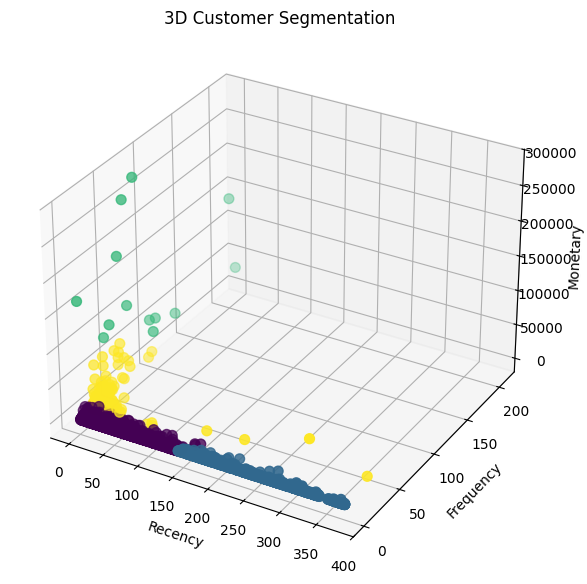

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation')
plt.show()


In [24]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

##RECOMMENDATION SYSTEM

In [25]:

# 1. Create pivot table
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

# 2. Transpose for item-based similarity
item_similarity = cosine_similarity(pivot.T)
item_similarity_df = pd.DataFrame(item_similarity, index=pivot.columns, columns=pivot.columns)

 # 3. Recommendation Function
def recommend_items(product_code, top_n=5):
    if product_code in item_similarity_df:
        sim_scores = item_similarity_df[product_code].sort_values(ascending=False)
        return sim_scores.iloc[1:top_n+1].index.tolist()
    else:
        return ["Product not found"]

# Example
recommend_items('84029E')

['82615', '21107', '85038', '22095', '72802A']

# Streamlit App Features


## 1. Product Recommendation Module
Objective:  
 When a user inputs a product name, the app recommends 5 similar products based on collaborative filtering.      

Functionality:      

 -Text input box for Product Name


-Button: Get Recommendations


-Display 5 recommended products as a styled list or card view


## 2.  Customer Segmentation Module
 Functionality:

3 number inputs for:


      1 Recency (in days)


       2Frequency (number of purchases)


       3Monetary (total spend)


-Button: Predict Cluster


-Display: Cluster label (e.g., High-Value, Regular, Occasional, At-Risk)



# Install Streamlit and ngrok

Streamlit must be started from inside Colab to work with your uploaded data.

Ngrok is used to tunnel the Colab-hosted Streamlit app to the outside world.

In [26]:
!pip install streamlit pyngrok


## Save your Streamlit app manually into a file (app.py)

In [27]:
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("online_retail.csv", encoding="ISO-8859-1")
df.dropna(subset=['CustomerID'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# RFM
latest = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

def label_cluster(row):
    if row['Cluster'] == 0:
        return 'High-Value'
    elif row['Cluster'] == 1:
        return 'At-Risk'
    elif row['Cluster'] == 2:
        return 'Occasional'
    else:
        return 'Regular'
rfm['Segment'] = rfm.apply(label_cluster, axis=1)

# Recommendation system
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
item_similarity = cosine_similarity(pivot.T)
item_sim_df = pd.DataFrame(item_similarity, index=pivot.columns, columns=pivot.columns)

def recommend_items(code):
    if code in item_sim_df:
        return item_sim_df[code].sort_values(ascending=False).iloc[1:6].index.tolist()
    return ["Product not found"]

# Streamlit UI
st.title("🛒 Shopper Spectrum")

st.header("📦 Product Recommendation")
product = st.text_input("Enter Product Code (e.g. 84029E):")
if st.button("Recommend"):
    recs = recommend_items(product.strip().upper())
    st.write("Recommended products:", recs)

st.header("👤 Customer Segmentation")
rec = st.number_input("Recency (days)")
freq = st.number_input("Frequency")
mon = st.number_input("Monetary")

if st.button("Predict Segment"):
    x = scaler.transform([[rec, freq, mon]])
    seg = kmeans.predict(x)[0]
    label = label_cluster({'Cluster': seg})
    st.success(f"Customer Segment: {label}")
''')


 ##  Run the App with Ngrok Tunnel

In [28]:
# Import Libraries
from pyngrok import ngrok, conf
import os, threading

# Set Ngrok Auth Token
conf.get_default().auth_token = "30V6vGEnRDQPBMaYlulBZ8cSpRk_4KWEcG3xeiGifWDEtobcB"

# Open tunnel
public_url = ngrok.connect(8501)
print("🔗 Streamlit App URL:", public_url)

# Launch Streamlit app
def run():
    os.system("streamlit run app.py")
threading.Thread(target=run).start()


🔗 Streamlit App URL: NgrokTunnel: "https://5dbb26a5c8d4.ngrok-free.app" -> "http://localhost:8501"


# Conclusion:
By applying RFM-based KMeans clustering, we effectively segmented customers into actionable groups (e.g., High-Value, At-Risk), while item-based collaborative filtering enabled accurate product recommendations based on real customer purchase patterns.

# Business Suggestion:
Use these insights to target High-Value customers with loyalty programs, re-engage At-Risk segments with discounts, and implement personalized product suggestions to boost cross-selling and revenue.